# Data Wrangling with WeRateDogs twitter data

## Gathering Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

pd.set_option('display.max_colwidth', -1)

In [2]:
# Read CSV file 'twitter-archive-enhanced.csv'
tweet_data = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Downloaded 'image-predictions.tsv' tsv file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# Save the tsv file 
with open("image-predictions.tsv", mode = 'wb') as file:
    file.write(response.content)
# Read the tsv file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

In [4]:
# import json file that was gathered from Twitter API 
# by the other jupyter notebook (gathering_twitter_data.ipynb)
with open('tweet_json.txt') as f:
    data = json.load(f)
tweet_json = pd.DataFrame(data, columns = ['tweet_id', 'favorites', 'retweets'])

## Assessing Data

First, we will look through `tweet_data` table.

In [5]:
tweet_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

- In 'name' column, there are some odd names such as 'a', 'the', 'such' etc. From seeing their text column, they seem extracted of 'definite articles'.
- We will be analyzing non-retweeted data so the data in retweet related columns has to be removed.

In [6]:
# Check if there is duplicated tweets in tweet_data table
tweet_data.tweet_id.duplicated().sum()

0

In [7]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- The data type of timestamp column is object not datetime.
- There are some columns that I won't use in this analysis such as 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.

In [8]:
tweet_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
tweet_data['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [10]:
# Count the number of rating_numerator that is more than 20
tweet_data[tweet_data['rating_numerator'] > 20].rating_numerator.count()

24

There are some very high rating such as more than 100, but the maximum of rating_numerator which is 1776 is too high. 

In [11]:
tweet_data['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [12]:
tweet_data[tweet_data['rating_denominator'] != 10].rating_denominator.count()

23

There is '0' value, which is invalid as this is 'denominator'.
Most of the values in 'rating_denominator' column are 10 which is supposed to be as its standard, but there are some different ratings. I would like to eliminate the ratings which are not 10 because they are minor cases.

In [13]:
# See what is in text where 'rating_denominator' is 0.
tweet_data[tweet_data['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


The tweet says the actual rate is 13/10, not 960/00. I will change these values to the correct ones.

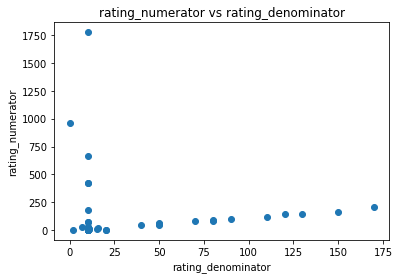

In [14]:
# See the relation between rating_numerator and rating_denominator
plt.scatter(tweet_data.rating_denominator, 
            tweet_data.rating_numerator)
plt.title('rating_numerator vs rating_denominator')
plt.xlabel('rating_denominator')
plt.ylabel('rating_numerator');

It seems like some plots that have its rating_denominator more than 30 have a liner relationshio with rating_numerator. High rating_denominator values are observed around 10 of rating_denominator.

I will create the ratio of between them, to normalize this evaluation.

In [15]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
# Check if there is duplicated tweets in tweet_data table
image_prediction.tweet_id.duplicated().sum()

0

In [17]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
tweet_json.head(5)

,tweet_id,favorites,retweets
0,892420643555336193,37682,8213
1,892177421306343426,32366,6075
2,891815181378084864,24378,4016
3,891689557279858688,41000,8361
4,891327558926688256,39197,9073


#### Quality
##### `tweet_data` table
- We only want original dog ratings (no retweets) that have image data.
- There are some odd name in 'name' column such as 'a', 'an, 'such', 'the' (definite articles).
- 'name' column is using "None" instead of "NaN".
- The data type of timestamp column is not datetime.
- There is a wrong value in rating_denominator column where rating_numerator/rating_denominator is 960/00. The correct one is 13/10.
- Create the ratio of rating_denominator and rating_numerator.
- There are some unnecessary columns in`tweet_data` table. ('in_reply_to_status_id', 'in_reply_to_user_id')

##### `image_prediction` table
- Some dog's names in p1, p2, p3 columns have an upper case letter at the beginning of the name, but the others just have lower case letters.
- p1, p2 and p3 should be categorical data type.
- I am not going to use p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns in `image_prediction` table

#### Tidiness
- The values of dog type columns, 'doggo', 'floofer', 'pupper and 'puppo' in `tweet_data` table should be one column since this is one variable that identify stage of dog.
- These three dataframes should be merged together into one dataframe since they are part of the same observational unit.

## Cleaning Data

In [19]:
#Create copies of original data
tweet_data_clean = tweet_data.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### Quality

#### `tweet_data`: We only want original dog ratings (no retweets) that have image data.

#### Define
Remove the retweeted rows and drop the related columns using `drop`.

#### Code

In [20]:
# Remove the retweeted rows 
tweet_data_clean = tweet_data_clean[tweet_data_clean['retweeted_status_timestamp'].isnull()]

In [21]:
# Drop the related columns
tweet_data_clean = tweet_data_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [22]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### `tweet_data`: There are some odd name in name column such as 'a', 'an', 'such', 'the' (definite articles)

##### Define
These define articles are in lowercase wheares dog names are capitalized. So we will replace only lowercase letters in name column with NaN using `apply`

##### Code

In [23]:
tweet_data_clean.name = tweet_data_clean.name.apply(lambda x: x if x[0:1].isupper() == True else np.nan)

##### Test

In [24]:
tweet_data_clean.query('name == "a" | name == "an" | name == "such" | name == "the"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### `tweet_data`: 'name' column is using "None" instead of "NaN".

##### Define
Replace 'None' with 'NaN' in `tweet_data` table using `replace`

#### Code

In [25]:
tweet_data_clean.name = tweet_data_clean.name.replace('None', np.nan)

##### Test

In [26]:
tweet_data_clean[['name']].sample(5)

,name
2308,Jeph
115,Zoey
1224,NaN
1776,Izzy
1906,Louis


#### `tweet_data`: The data type of timestamp column is not datetime.

##### Define
Convert the datatype of timestamp column using `to_datetime`

##### Code

In [27]:
tweet_data_clean.timestamp = pd.to_datetime(
    tweet_data_clean.timestamp, infer_datetime_format=True)

##### Test

In [28]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


#### `tweet_data`: There is a wrong value in rating_denominator where rating_numerator/rating_denominator is 960/00. The correct one is 13/10.

#### Define
Replace the wrong values with the correct values

#### Code

In [29]:
tweet_data_clean.loc[313,'rating_numerator'] = 13
tweet_data_clean.loc[313,'rating_denominator'] = 10

#### Test

In [30]:
tweet_data_clean.loc[313:313]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,13,10,NaN,None,None,None,None


#### `tweet_data`: Create the ratio of rating_denominator and rating_numerator.

#### Define
Create a new column, 'rating_ratio' that has the ratio of rating_numerator/rating_denominator. 

#### Code

In [31]:
tweet_data_clean['rating_ratio'] = tweet_data_clean.rating_numerator/tweet_data_clean.rating_denominator

#### Test

In [32]:
tweet_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_ratio
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,1.2


#### `tweet_data`: There are some unnecessary columns. ('in_reply_to_status_id', 'in_reply_to_user_id')

#### Define
Drop these columns: 'in_reply_to_status_id', 'in_reply_to_user_id' using drop

#### Code

In [33]:
tweet_data_clean = tweet_data_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [34]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
rating_ratio          2175 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 317.9+ KB


#### `image_prediction`: Some dog's names in p1, p2, p3 columns have an upper case letter at the beginning of the name, but the others just have lower case letters.

#### Define
Change all the initial alphabet to capital letters in p1, p2 and p3 using `capitalize`

#### Code

In [35]:
image_prediction_clean.p1 = image_prediction_clean.p1.str.capitalize()
image_prediction_clean.p2 = image_prediction_clean.p2.str.capitalize()
image_prediction_clean.p3 = image_prediction_clean.p3.str.capitalize()

#### Test

In [36]:
image_prediction_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


#### `image_prediction`: p1, p2 and p3 should be categorical data type.

#### Define
Change the data type to "categorical" using `astype`.

#### Code

In [37]:
image_prediction.p1 = image_prediction.p1.astype("category")
image_prediction.p2 = image_prediction.p2.astype("category")
image_prediction.p3 = image_prediction.p3.astype("category")

#### Test

In [38]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


#### `image_prediction`: I am not going to use p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns.

#### Define
Drop p2, p2_conf, p2_dog, p, p3_conf, p3_dog columns from image_prediction_clean table using `drop`

#### Code

In [39]:
image_prediction_clean = image_prediction_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

In [40]:
image_prediction_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True


### Tidiness

#### The values of dog type columns, 'doggo', 'floofer', 'pupper and 'puppo' in `tweet_data` table should be one column since this is one variable that identify stage of dog.

#### Define
Merge those 4 columns to one column using `join`

In [41]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
rating_ratio          2175 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 317.9+ KB


#### Code

In [42]:
tweet_data_clean.doggo = tweet_data_clean.doggo.replace('None', np.nan)
tweet_data_clean.floofer = tweet_data_clean.floofer.replace('None', np.nan)
tweet_data_clean.pupper = tweet_data_clean.pupper.replace('None', np.nan)
tweet_data_clean.puppo = tweet_data_clean.puppo.replace('None', np.nan)

In [43]:
# Combine these four stages into one column called 'dog_stage'
tweet_data_clean['dog_stage'] = tweet_data_clean.loc[:,['doggo','floofer','pupper','puppo']].apply(
    lambda x: ','.join(x.dropna().astype(str).astype(str)),axis=1)

#### Test

In [44]:
tweet_data_clean.dog_stage.value_counts()

                 1831
pupper           224 
doggo            75  
puppo            24  
doggo,pupper     10  
floofer          9   
doggo,floofer    1   
doggo,puppo      1   
Name: dog_stage, dtype: int64

#### These three dataframes should be merged together into one dataframe since they are part of the same observational unit.

##### Define
Merge tweet_data table and tweet_json table joining on given name and tweet_id by using `merge`

##### Code

In [45]:
# Merge tweet_data_clean table and tweet_json_clean table
first_merge = pd.merge(tweet_data_clean, tweet_json_clean,
                            on=['tweet_id'], how='left')

In [46]:
# Drop rows that don't have favorites and retweets values
first_merge = first_merge.dropna(subset=['favorites'])

In [47]:
# Merge first_mergetable and image_prediction_clean table
final_data = pd.merge(first_merge, image_prediction_clean,
                            on=['tweet_id'], how='left')

##### Test

In [48]:
final_data.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,puppo,rating_ratio,dog_stage,favorites,retweets,jpg_url,img_num,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,...,NaN,1.3,,37682.0,8213.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False


## Storing Data

In [49]:
# Store final_data data frame to csv file
final_data.to_csv('final_data.csv', index=False)

## Data Visualization & Insights

### Univariate Analysis

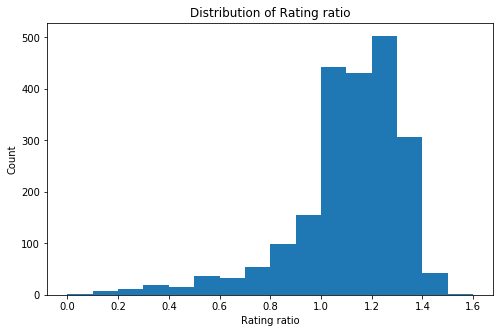

In [50]:
# Check the histogram of rating_ratio
plt.figure(figsize=(8, 5))
plt.xlabel('Rating ratio')
plt.ylabel('Count')
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
plt.hist(final_data.rating_ratio, bins = bins)
plt.title('Distribution of Rating ratio');

In [51]:
final_data.rating_ratio.describe()

count    2170.000000
mean     1.223625   
std      4.251641   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      177.600000 
Name: rating_ratio, dtype: float64

In [52]:
# Count the number of rating_ratiothat is more than 2
final_data[final_data['rating_ratio'] > 2].rating_ratio.count()

9

The distribution of rating ratio is left skwed. There are some high values more than 2.0, and the number is 9.

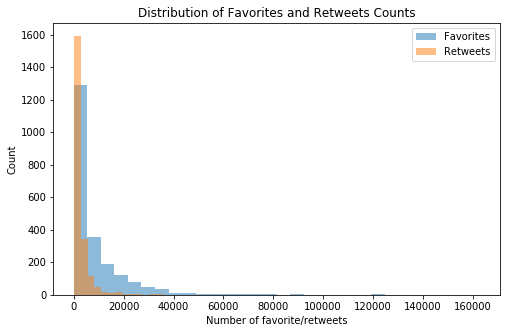

In [53]:
# See the histogram of favorites and retweets
plt.figure(figsize=(8, 5))
plt.xlabel('Number of favorite/retweets')
plt.ylabel('Count')
plt.hist(final_data.favorites, alpha=.5, label='Favorites', bins = 30)
plt.hist(final_data.retweets, alpha=.5, label='Retweets', bins = 30)
plt.title('Distribution of Favorites and Retweets Counts')
plt.legend();

In [54]:
final_data[['favorites','retweets']].describe()

,favorites,retweets
count,2170.000000,2170.000000
mean,8489.958525,2611.757143
std,12472.243010,4636.993828
min,51.000000,1.000000
25%,1802.250000,561.250000
50%,3827.500000,1249.500000
75%,10575.750000,2977.250000
max,162693.000000,82777.000000


- The both distributions of favorites and retweets are right skewd.
- People tend to do 'favorite' action rather than 'retweet' from the fact the mean of favorites is 8489 and the mean of retweets is 2611.

### Bivariate Analysis

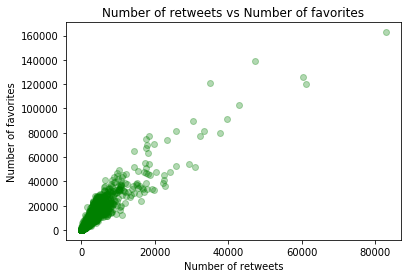

In [55]:
# Create a scatter plot of rating_ratio vs. favorites
plt.scatter(final_data.retweets, 
            final_data.favorites, alpha = .3, color = 'green')
plt.title('Number of retweets vs Number of favorites')
plt.xlabel('Number of retweets')
plt.ylabel('Number of favorites');

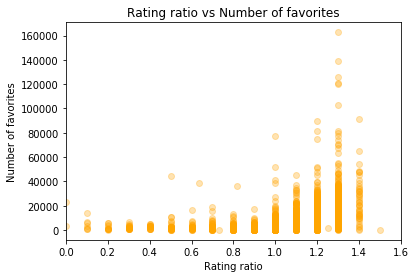

In [56]:
# Create a scatter plot of rating_ratio vs. favorites
plt.scatter(final_data.rating_ratio, 
            final_data.favorites, alpha = .3, color = 'orange')
plt.xlim(0, 1.6)
plt.title('Rating ratio vs Number of favorites')
plt.xlabel('Rating ratio')
plt.ylabel('Number of favorites');

The number of favorites more than 100,000 and the highest number of favorites is observed at 1.3 of rating ratio, even though there are higher ratings.

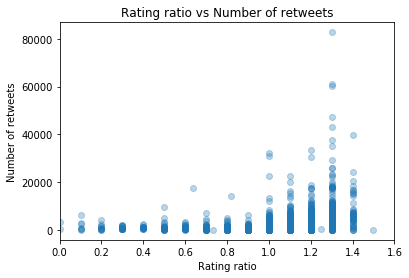

In [57]:
# Create a scatter plot of rating_ratio vs. retweets
plt.scatter(final_data.rating_ratio, 
            final_data.retweets, alpha = .3)
plt.xlim(0, 1.6)
plt.title('Rating ratio vs Number of retweets')
plt.xlabel('Rating ratio')
plt.ylabel('Number of retweets');

The number of retweets more than 45,000 and the highest number of retweets is observed at 1.3 of rating ratio, even though there are higher ratings.

### Multivariate Analysis

In [58]:
# Check & Remove outliers in rating_ratio
final_data.rating_ratio.sort_values(ascending=True)

264     0.000000  
837     0.000000  
1756    0.100000  
2075    0.100000  
1907    0.100000  
1685    0.100000  
1264    0.100000  
1854    0.100000  
2152    0.100000  
2053    0.200000  
1578    0.200000  
1581    0.200000  
984     0.200000  
1736    0.200000  
2124    0.200000  
2140    0.200000  
2062    0.200000  
1895    0.200000  
2163    0.200000  
1416    0.200000  
2148    0.300000  
1763    0.300000  
2119    0.300000  
1224    0.300000  
2018    0.300000  
1754    0.300000  
1510    0.300000  
1744    0.300000  
1652    0.300000  
1132    0.300000  
          ...     
53      1.400000  
290     1.400000  
356     1.400000  
170     1.400000  
701     1.400000  
612     1.400000  
403     1.400000  
123     1.400000  
61      1.400000  
1423    1.400000  
179     1.400000  
363     1.400000  
506     1.400000  
142     1.400000  
38      1.400000  
182     1.400000  
528     1.400000  
97      1.400000  
33      1.400000  
246     1.500000  
52      1.700000  
1530    2.60

In [59]:
# I would like to remove the data more than 3
no_outlier_final = final_data[final_data['rating_ratio'] < 3]

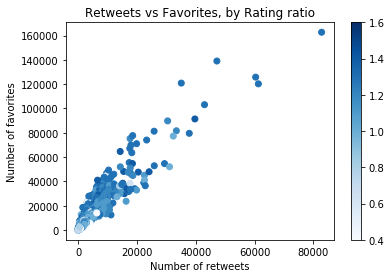

In [60]:
# Create a scatter plot of retweets vs favorites, by rating_ratio, 
# removing rating ratio more than 3.0
plt.scatter(x = no_outlier_final.retweets,
            y = no_outlier_final.favorites,
            c = no_outlier_final.rating_ratio,
            vmin=0.4, vmax=1.6,
            cmap="Blues")
plt.colorbar()
plt.title('Retweets vs Favorites, by Rating ratio')
plt.xlabel('Number of retweets')
plt.ylabel('Number of favorites');

The dogs that have lower numbers of retweets and favorites have lower ratings.

In [61]:
# Create a dataframe that holds mean values of rating_ratio, retweets, 
# favorites grouped by a breed
data_groupby_p1 = final_data[['rating_ratio','retweets', 
                              'favorites', 'p1']].groupby('p1').mean()
data_groupby_p1 = data_groupby_p1.rename(columns = 
                                           {"rating_ratio" : "rating_ratio_mean", 
                                            "retweets" : "retweets_mean", 
                                            "favorites" : "favorites_mean"})

# Count the number of data of each breed
data_groupby_p1_num = final_data.groupby('p1').size().reset_index(name='counts')

# Merge both tables
data_mean = pd.merge(data_groupby_p1, data_groupby_p1_num, on=['p1'])

In [62]:
# I would like to focus on the breed that has higher 
# than 1.0 and less than 5.0 rating_ratio and remove high outliers
higher_rating = data_mean.drop(data_mean[data_mean.rating_ratio_mean > 5].index)

In [63]:
higher_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 373
Data columns (total 5 columns):
p1                   372 non-null object
rating_ratio_mean    372 non-null float64
retweets_mean        372 non-null float64
favorites_mean       372 non-null float64
counts               372 non-null int64
dtypes: float64(3), int64(1), object(1)
memory usage: 17.4+ KB


In [64]:
# I also would like to remove where the count is less than 3
# because it coule be a misprediction on image prediction
higher_rating = higher_rating.drop(higher_rating[higher_rating.counts <= 3].index)

In [65]:
higher_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 6 to 372
Data columns (total 5 columns):
p1                   114 non-null object
rating_ratio_mean    114 non-null float64
retweets_mean        114 non-null float64
favorites_mean       114 non-null float64
counts               114 non-null int64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.3+ KB


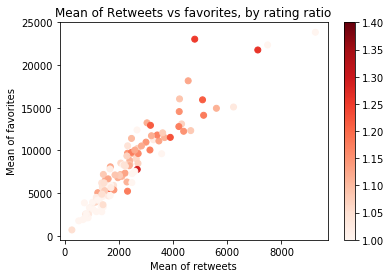

In [66]:
plt.scatter(x = higher_rating.retweets_mean,
            y = higher_rating.favorites_mean,
            c = higher_rating.rating_ratio_mean,
            cmap="Reds", vmin=1, 
            vmax=1.4)
plt.colorbar()
plt.title('Mean of Retweets vs favorites, by rating ratio')
plt.xlabel('Mean of retweets')
plt.ylabel('Mean of favorites');

From the scatter plot above, breeds that get higher retweets and favorites tend to have higher rating.

There are some interesting plots whish are described below.
1. There is a dog which has highest favorites and highest retweets, at x ≒ 9500 and y ≒ 24000.
2. There is a dog that has very high rating but not high retweets or favorites, at x ≒ 2300 and y ≒ 7500.

In [67]:
# Identify the dog of the first one 
higher_rating.query('favorites_mean > 20000')

,p1,rating_ratio_mean,retweets_mean,favorites_mean,counts
158,Hippopotamus,0.800000,9250.500000,23850.500000,4
160,Home_theater,1.260000,7125.400000,21772.200000,5
277,Saluki,1.250000,4797.250000,23038.750000,4
323,Swing,0.971429,7488.142857,22364.285714,7


The first one's name is 'Hippopotamus'. This is an incorrect prediction. There are also two which are prediceted as 'Swing' and 'Home_theater', and they are incorrect predictions.

There is a dog breed 'Saluki', that has a high mean of rating ratio and high retweets and favorites at x ≒ 4797 and y ≒ 23038.

In [68]:
# Identify the dog of the second one 
higher_rating.query(
    'retweets_mean > 2000 & retweets_mean < 3000 & favorites_mean > 6000 & favorites_mean < 8000')

,p1,rating_ratio_mean,retweets_mean,favorites_mean,counts
9,American_staffordshire_terrier,1.100000,2056.769231,7170.923077,13
88,Collie,1.110000,2107.700000,6961.800000,10
255,Pomeranian,1.286842,2675.736842,7770.868421,38
275,Rottweiler,1.129412,2223.941176,7333.588235,17
280,Schipperke,1.077778,2023.555556,7052.222222,9
288,Seat_belt,0.904762,2584.809524,7551.714286,21
339,Toy_poodle,1.110526,2294.605263,6297.000000,38
351,Walker_hound,0.900000,2477.200000,6225.800000,5
368,Wombat,0.925000,2486.500000,7274.000000,4


From the rating_ratio, the plot should be Pomeranian. The counts of Pomeranian is 38 which is high, therefore Pomeranian constantly gets higher rating from WeRateDogs regardless of users' retweets and favorites.

## Conclusion

There were many odd ‘rating_numerator’ and ‘rating_denominator’ in the raw data frame. The number of ‘rating_numerator’ more than 20 is 24. But after normalizing those two by calculating their ratio, odd values are decreased. The ratio which has more than 2.0, which has to be the same meaning as 20 of ‘rating_numerator’ if the original rating system is implemented, is only 9.

Seeing from the histogram of rating ratio, the distribution of is left skewed. That means WeRateDogs tend to give a finely-shred rating if the rate is below the mean, that is 1.22, but more than the mean, WeRateDogs tend to give a very high rating.
The histogram of retweets and favorites are both right skewed. From the mean of each data, in most cases, users react with favorites than retweets.

Clearly seeing in the scatter plot of 'Number of retweets vs Number of favorites', these two values have a linear relationship except values in very low favorites. This is an interesting fact.
From the scatter plot of 'Rating ratio vs Number of favorites', the number of favorites more than 100,000 and the highest number of favorites is observed at 1.3 of rating ratio, even though there are higher ratings.
Also, the same thing can be said to the scatter plot of 'Rating ratio vs Number of retweets'. The number of retweets more than 40,000 and the highest number of retweets is observed at 1.3 of rating ratio, even though there are higher ratings.

From those two above, the rate around 1.3 seems to have a good balance between user’s preference and WeRateDogs’ preference.
From the scatter plot of 'Retweets vs Favorites, by Rating ratio', we can clearly see higher numbers of retweets and favorites have higher ratings, especially when favorites are less than 20,000 and the retweets are less than 20,000.

The same thing can be said in the scatter plot of 'Mean of Retweets vs favorites, by rating ratio' (figure below), but there are some exceptions in higher retweets and favorites. There is a dog that has very high rating with not so high retweets or favorites, at x ≒ 2300 and y ≒ 7500. I found out the breed is ‘Pomeranian’. Pomeranian has been presented in WeRateDogs’ tweets for 38 times so far, so this breed constantly gets higher ratings from WeRateDogs.